# Sarcasm Detection


# Problem Description:
Sarcasm is "a sharp, bitter, or cutting expression or remark; a bitter gibe or taunt". Sarcasm may employ ambivalence, although sarcasm is not necessarily ironic. Most noticeable in spoken word, sarcasm is mainly distinguished by the inflection with which it is spoken and is largely context-dependent.In sarcasm, ridicule or mockery is used harshly, often crudely and contemptuously, for destructive purposes. It may be used in an indirect manner, and have the form of irony.

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and  language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

## Objective:
 The goal of the project is to  build a model to detect whether a sentence is sarcastic or not.

## Data Description:
News Headlines dataset for Sarcasm Detection. The dataset is collected from two 
news websites, theonion.com and huffingtonpost.com. This new dataset has the 
following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are 
no spelling mistakes and informal usage. This reduces the sparsity and also 
increases the chance of finding pre-trained embedding.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are selfcontained. This would help us in teasing apart the real sarcastic elements.

### Content
Each record consists of three attributes:
-  is_sarcastic: 1 if the record is sarcastic otherwise 0
-  headline: the headline of the news article
-  article_link: link to the original news article. Useful in collecting supplementary data

# (1)Mounting drive in Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# (2)Importing important libraries

In [3]:
%tensorflow_version 2.x

In [4]:
import tensorflow 
tensorflow.__version__

'2.2.0'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#Random number generator
import random
random.seed(0)

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# (3)Changing the current working directory to project folder

In [6]:
project_path=('/content/drive/My Drive/Module-NLP/Project 2')

In [7]:
os.chdir(project_path)

In [8]:
#os.listdir(project_path)
#ls

# (4)Reading the file and exploring the data

In [9]:
df=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)

In [10]:
df.head(8)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0


In [11]:
df.shape

(26709, 3)

In [12]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

From above we can see that there is no missing values.Let's see one headline

In [13]:
df['headline'][2]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [14]:
df['is_sarcastic'].mean()

0.43895316185555433

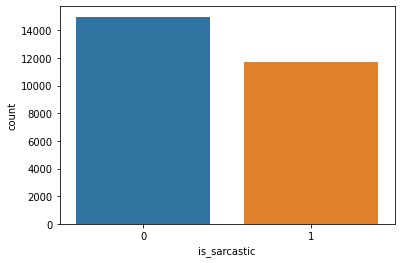

In [15]:
import seaborn as sns
sns.countplot(df['is_sarcastic'])

From above we can observe that we have about 44 percent records in which headline is Sarcastic.It can be clearly seen from the above figure that the dataset is not imbalanced

# (5)Dropping irrelevant column

In [16]:
d_frame=df.drop(columns='article_link',axis=1)
d_frame.head(5)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


# (6)Getting length of each sentence and finding maximum length of the sentence

In [17]:
word_count=[]
for i in range(len(d_frame)):
  x=len(d_frame['headline'][i].split())
  word_count.append(x)

In [18]:
word_count

[12,
 14,
 14,
 13,
 11,
 4,
 7,
 14,
 7,
 9,
 10,
 8,
 12,
 10,
 8,
 8,
 16,
 7,
 9,
 3,
 7,
 16,
 11,
 9,
 13,
 7,
 8,
 4,
 7,
 7,
 8,
 10,
 12,
 9,
 8,
 8,
 5,
 15,
 11,
 10,
 10,
 15,
 8,
 8,
 8,
 6,
 15,
 11,
 7,
 4,
 4,
 11,
 9,
 13,
 14,
 11,
 11,
 9,
 10,
 12,
 4,
 5,
 6,
 13,
 12,
 9,
 12,
 17,
 7,
 7,
 8,
 9,
 9,
 8,
 13,
 11,
 9,
 10,
 5,
 8,
 10,
 8,
 10,
 13,
 10,
 11,
 14,
 11,
 17,
 13,
 4,
 19,
 12,
 8,
 11,
 9,
 10,
 10,
 11,
 9,
 7,
 12,
 9,
 10,
 6,
 9,
 7,
 10,
 6,
 11,
 12,
 12,
 7,
 22,
 9,
 11,
 10,
 19,
 12,
 13,
 8,
 3,
 10,
 10,
 9,
 9,
 11,
 8,
 4,
 14,
 11,
 8,
 6,
 11,
 8,
 7,
 11,
 9,
 11,
 9,
 11,
 11,
 8,
 6,
 10,
 8,
 10,
 9,
 11,
 15,
 9,
 8,
 6,
 11,
 7,
 9,
 8,
 11,
 7,
 18,
 9,
 7,
 9,
 14,
 14,
 13,
 9,
 15,
 11,
 8,
 8,
 10,
 14,
 9,
 9,
 6,
 12,
 5,
 10,
 7,
 13,
 14,
 8,
 7,
 10,
 9,
 15,
 10,
 11,
 11,
 11,
 12,
 6,
 8,
 9,
 12,
 6,
 8,
 12,
 16,
 7,
 14,
 12,
 9,
 7,
 13,
 6,
 7,
 12,
 9,
 10,
 6,
 13,
 15,
 6,
 22,
 9,
 11,
 15,
 9,
 12,
 10,

In [19]:
max_length=max(word_count)

In [20]:
print('Maximum word in the sentence is : ',max_length)

Maximum word in the sentence is :  39


# (7)Text Preprocessing

In [21]:
# Importing libraries useful for text preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 


In [22]:
# Setting different parameters for the model

max_features=10000
max_len=max_length
embedding_size=200

In [23]:
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(d_frame['headline']))

In [24]:
X=tokenizer.texts_to_sequences(d_frame['headline'])
y=np.asarray(d_frame['is_sarcastic'])

In [25]:
d_frame['headline'][0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [26]:
X[0]

[307, 678, 3336, 2297, 47, 381, 2575, 5, 2576, 8433]

The above is the index assigned to the words for the given  headline

In [27]:
word_index=tokenizer.word_index
word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

From the above we can see all the words have been given a unique index

In [28]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
# Padding in order to bring all sentece of equal length.
X_pad=pad_sequences(X,maxlen=max_len)
X_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  307,  678, 3336, 2297,
         47,  381, 2575,    5, 2576, 8433], dtype=int32)

The above represent vector representation of the 1st sentence

In [30]:
print('Number of Samples :',len(X_pad))
print('Number of labels :',len(y))

Number of Samples : 26709
Number of labels : 26709


### Getting the vocabulary size

In [31]:
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.Thus our vocab size increases by 1

vocab_size=len(tokenizer.word_index)+1
vocab_size

29657

# (8)Splitting the dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pad,y,test_size=0.2,random_state=2)

In [33]:
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (21367, 39)
X_test shape : (5342, 39)
y_train shape : (21367,)
y_test shape : (5342,)


# (9)Word Embedding

Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. 

In [34]:
glove_file= "glove.6B.zip"
from zipfile import ZipFile
with ZipFile(glove_file,'r') as z:
  z.extractall()
  z.close()


### Getting the Glove Word Embeddings 

In [35]:
EMBEDDING_FILE = './glove.6B.200d.txt'
#By opening the txt file we can see that at index 0 we have word and from index 1 to last its vector representation is given

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd


Let see given glove word embedding for one word

In [36]:
print(embeddings['to'])
#embeddings.get('to')
print('length is :',len(embeddings['to']))

[ 5.7346e-01  5.4170e-01 -2.3477e-01 -3.6240e-01  4.0370e-01  1.1386e-01
 -4.4933e-01 -3.0991e-01 -5.3411e-03  5.8426e-01 -2.5956e-02  4.9393e-01
 -3.7209e-02 -2.8428e-01  9.7696e-02 -4.8907e-01  2.6027e-02  3.7649e-01
  5.7788e-02 -4.6807e-01  8.1288e-02  3.2825e+00 -6.3690e-01  3.7956e-01
  3.8167e-03  9.3607e-02 -1.2855e-01  1.7380e-01  1.0522e-01  2.8648e-01
  2.1089e-01 -4.7076e-01  2.7733e-02 -1.9803e-01  7.6328e-02 -8.4629e-01
 -7.9708e-01 -3.8743e-01 -3.0422e-02 -2.6849e-01  4.8585e-01  1.2895e-01
  3.8354e-01  3.8722e-01 -3.8524e-01  1.9075e-01  4.8998e-01  1.3278e-01
  1.0792e-02  2.6770e-01  1.7812e-01 -1.1433e-01 -3.3494e-01  8.7306e-01
  7.5875e-01 -3.0378e-01 -1.5626e-01  1.2085e-03  2.3322e-01  2.7953e-01
 -1.8494e-01 -1.4146e-01 -1.8969e-01 -3.8386e-02  3.5874e-01  6.5513e-02
  6.0565e-02  6.6339e-01 -8.3252e-02  6.5163e-02  5.1761e-01  1.6171e-01
  4.6011e-01  1.6388e-01 -1.2399e-01  3.1122e-01 -1.5412e-01 -1.0917e-01
 -4.2551e-01  1.1418e-01  2.5137e-01 -5.6158e-02 -2

From above we can clearly see how a word is represented in 200 dimenesions

In [37]:
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer.word_index.items():
  if i<vocab_size:
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

# (10)Model Creation



In [38]:
# Importing necessary libraries

from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM,Bidirectional,GRU
from keras.layers import Embedding, Flatten, Dense,Dropout

Using TensorFlow backend.


## (i)Model without RNN

In [39]:
model_0=Sequential()

#Embedding layer
model_0.add(Embedding(input_dim=vocab_size,output_dim=200,input_length=max_len,weights=[embedding_matrix]))
model_0.add(Flatten())
#Fully connected layer
model_0.add(Dense(16,activation='relu'))
#Dropout for regularization
model_0.add(Dropout(0.5))
#Output layer
model_0.add(Dense(1,activation='sigmoid'))

model_0.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history_0=model_0.fit(X_train,y_train,epochs=5,batch_size=100,validation_data=(X_test,y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 4s 200us/step - loss: 0.5543 - acc: 0.7051 - val_loss: 0.3987 - val_acc: 0.8267
Epoch 2/5
21367/21367 [==============================] - 2s 108us/step - loss: 0.3443 - acc: 0.8551 - val_loss: 0.3342 - val_acc: 0.8575
Epoch 3/5
21367/21367 [==============================] - 2s 109us/step - loss: 0.2376 - acc: 0.9103 - val_loss: 0.3361 - val_acc: 0.8654
Epoch 4/5
21367/21367 [==============================] - 2s 109us/step - loss: 0.1618 - acc: 0.9408 - val_loss: 0.3688 - val_acc: 0.8611
Epoch 5/5
21367/21367 [==============================] - 2s 109us/step - loss: 0.1018 - acc: 0.9663 - val_loss: 0.4599 - val_acc: 0.8566


In [40]:
results_0= model_0.evaluate(X_test, y_test)
print('Test loss: ', results_0[0])
print('Test accuracy: ', results_0[1])

5342/5342 [==============================] - 0s 67us/step
Test loss:  0.4598687316696548
Test accuracy:  0.8566080331802368


# (ii)Model with simple RNN

In [41]:
from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM,Bidirectional,GRU
from keras.layers import Embedding, Flatten, Dense,Dropout
model_1=Sequential()
#Embedding layer
model_1.add(Embedding(input_dim=vocab_size,output_dim=200,input_length=max_len,weights=[embedding_matrix]))
model_1.add(SimpleRNN(32))
#Fully connected layer
model_1.add(Dense(16,activation='relu'))
#Dropout for regularization
model_1.add(Dropout(0.5))
#Output layer
model_1.add(Dense(1,activation='sigmoid'))

In [42]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 39, 200)           5931400   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                7456      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 5,939,401
Trainable params: 5,939,401
Non-trainable params: 0
_________________________________________________________________


In [43]:
#compile the model
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [44]:
history_1=model_1.fit(X_train,y_train,epochs=5,batch_size=100,validation_data=(X_test,y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 11s 522us/step - loss: 0.6435 - acc: 0.6113 - val_loss: 0.4960 - val_acc: 0.7737
Epoch 2/5
21367/21367 [==============================] - 11s 508us/step - loss: 0.4101 - acc: 0.8265 - val_loss: 0.3493 - val_acc: 0.8551
Epoch 3/5
21367/21367 [==============================] - 11s 502us/step - loss: 0.2825 - acc: 0.8951 - val_loss: 0.3990 - val_acc: 0.8319
Epoch 4/5
21367/21367 [==============================] - 11s 515us/step - loss: 0.2157 - acc: 0.9225 - val_loss: 0.3751 - val_acc: 0.8538
Epoch 5/5
21367/21367 [==============================] - 11s 502us/step - loss: 0.1480 - acc: 0.9527 - val_loss: 0.4093 - val_acc: 0.8605


In [45]:
results_1= model_1.evaluate(X_test, y_test)
print('Test loss: ', results_1[0])
print('Test accuracy: ', results_1[1])

5342/5342 [==============================] - 1s 178us/step
Test loss:  0.4093302488550181
Test accuracy:  0.8605391383171082


Text(0.5, 1.0, 'Epochs vs. Training and Validation Loss')

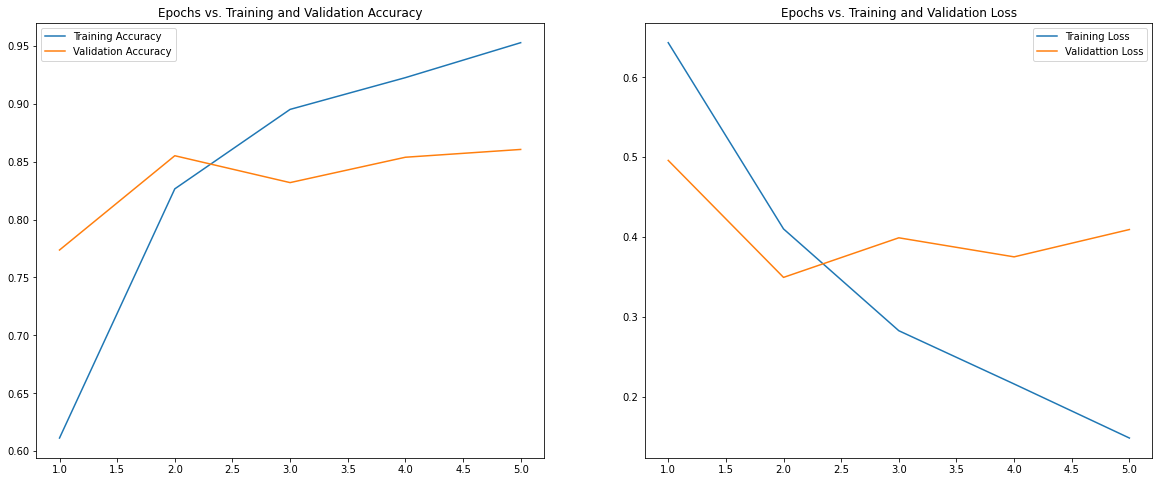

In [46]:
import matplotlib.pyplot as plt
train_acc=history_1.history['acc']
valid_acc=history_1.history['val_acc']

train_loss=history_1.history['loss']
valid_loss=history_1.history['val_loss']

epochs=range(1,len(train_acc)+1)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='Training Accuracy')
plt.plot(epochs,valid_acc,label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs,valid_loss,label='Validattion Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

# (iii)Model with LSTM

In [47]:
model_2=Sequential()
#Embedding layer
model_2.add(Embedding(input_dim=vocab_size,output_dim=200,input_length=max_len,weights=[embedding_matrix]))
model_2.add(LSTM(128))

#Fully connected layer
model_2.add(Dense(16,activation='relu'))
#Dropout for regularization
model_2.add(Dropout(0.5))
#Output layer
model_2.add(Dense(1,activation='sigmoid'))

model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history_2=model_2.fit(X_train,y_train,epochs=5,batch_size=100,validation_data=(X_test,y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 27s 1ms/step - loss: 0.4797 - acc: 0.7675 - val_loss: 0.3642 - val_acc: 0.8443
Epoch 2/5
21367/21367 [==============================] - 26s 1ms/step - loss: 0.2948 - acc: 0.8867 - val_loss: 0.3051 - val_acc: 0.8690
Epoch 3/5
21367/21367 [==============================] - 25s 1ms/step - loss: 0.2073 - acc: 0.9272 - val_loss: 0.3089 - val_acc: 0.8744
Epoch 4/5
21367/21367 [==============================] - 25s 1ms/step - loss: 0.1477 - acc: 0.9521 - val_loss: 0.3447 - val_acc: 0.8731
Epoch 5/5
21367/21367 [==============================] - 25s 1ms/step - loss: 0.1011 - acc: 0.9708 - val_loss: 0.4472 - val_acc: 0.8710


In [48]:
results_2= model_2.evaluate(X_test, y_test)
print('Test loss: ', results_2[0])
print('Test accuracy: ', results_2[1])

5342/5342 [==============================] - 1s 276us/step
Test loss:  0.4472094138589793
Test accuracy:  0.87102210521698


Text(0.5, 1.0, 'Epochs vs. Training and Validation Loss')

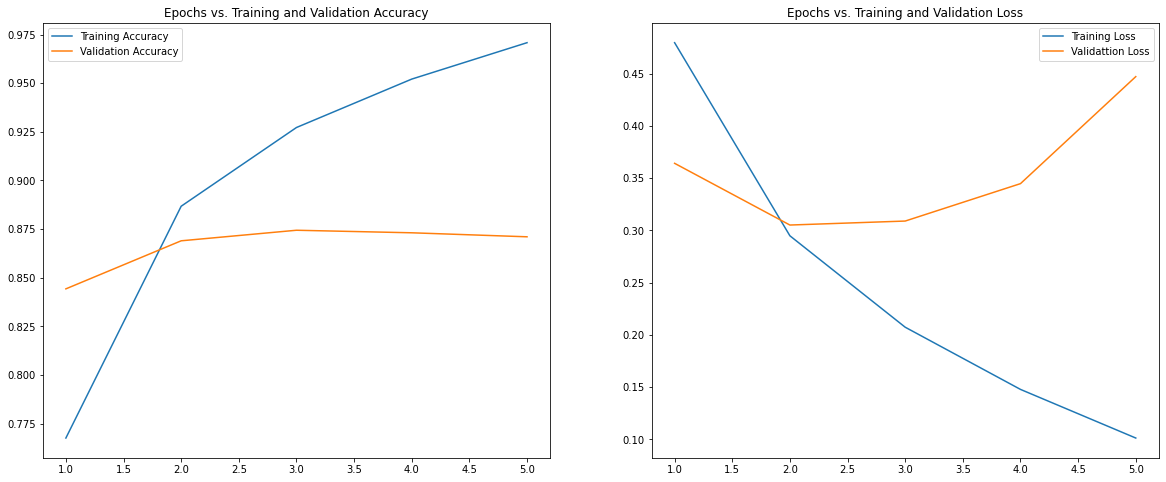

In [49]:
train_acc=history_2.history['acc']
valid_acc=history_2.history['val_acc']

train_loss=history_2.history['loss']
valid_loss=history_2.history['val_loss']

epochs=range(1,len(train_acc)+1)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='Training Accuracy')
plt.plot(epochs,valid_acc,label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs,valid_loss,label='Validattion Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

From the above we can see that model is overfitting .Lets take lesser epochs

# (iv)Model with Bidirectional LSTM and GRU

In [60]:
model_3=Sequential()
#Embedding layer
model_3.add(Embedding(input_dim=vocab_size,output_dim=200,input_length=max_len,weights=[embedding_matrix]))
model_3.add(Bidirectional(LSTM(128, return_sequences = True)))
model_3.add(Bidirectional(GRU(32)))

#Fully connected layer
model_3.add(Dense(16,activation='relu'))
#Dropout for regularization
model_3.add(Dropout(0.5))
#Output layer
model_3.add(Dense(1,activation='sigmoid'))

model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history_3=model_3.fit(X_train,y_train,epochs=3,batch_size=100,validation_data=(X_test,y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/3
21367/21367 [==============================] - 102s 5ms/step - loss: 0.4878 - acc: 0.7657 - val_loss: 0.3247 - val_acc: 0.8630
Epoch 2/3
21367/21367 [==============================] - 98s 5ms/step - loss: 0.2907 - acc: 0.8886 - val_loss: 0.3007 - val_acc: 0.8759
Epoch 3/3
21367/21367 [==============================] - 97s 5ms/step - loss: 0.2027 - acc: 0.9282 - val_loss: 0.3302 - val_acc: 0.8744


In [61]:
results_3= model_3.evaluate(X_test, y_test)
print('Test loss: ', results_3[0])
print('Test accuracy: ', results_3[1])

5342/5342 [==============================] - 5s 973us/step
Test loss:  0.33017652136183373
Test accuracy:  0.8743916153907776


Text(0.5, 1.0, 'Epochs vs. Training and Validation Loss')

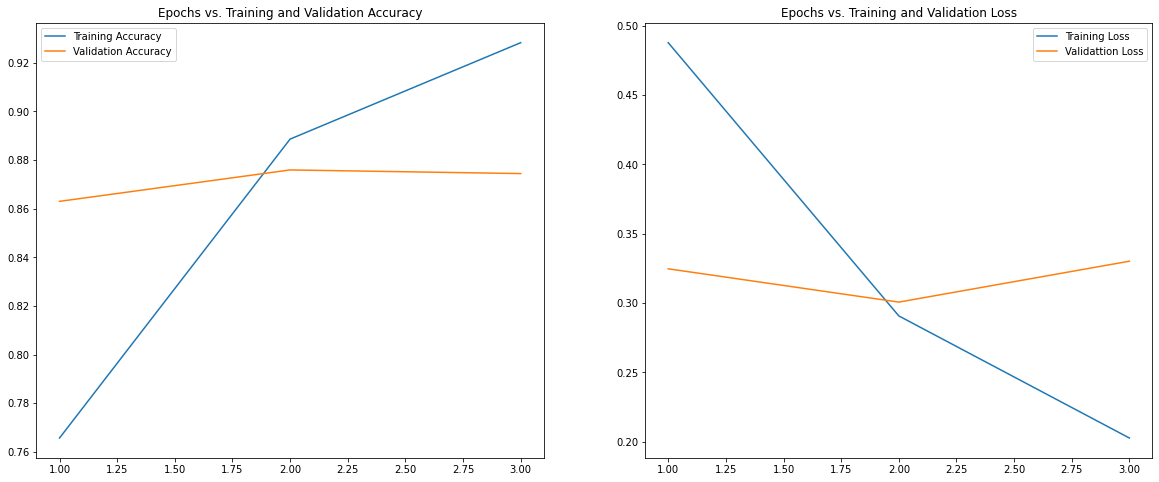

In [62]:
train_acc=history_3.history['acc']
valid_acc=history_3.history['val_acc']

train_loss=history_3.history['loss']
valid_loss=history_3.history['val_loss']

epochs=range(1,len(train_acc)+1)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='Training Accuracy')
plt.plot(epochs,valid_acc,label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs,valid_loss,label='Validattion Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')



# (11)Model Comparison

In [63]:
df_score=pd.DataFrame(columns=['Model','Validation_Accuracy','Validation_Loss'])
df_score['Model']=["Model without any RNN","Model with simple RNN","Model with LSTM","Model with Biderctional LSTM"]
df_score['Validation_Accuracy']=[results_0[1],results_1[1],results_2[1],results_3[1]]
df_score['Validation_Loss']=[results_0[0],results_1[0],results_2[0],results_3[0]]
df_score

,Model,Validation_Accuracy,Validation_Loss
0,Model without any RNN,0.856608,0.459869
1,Model with simple RNN,0.860539,0.409330
2,Model with LSTM,0.871022,0.447209
3,Model with Biderctional LSTM,0.874392,0.330177


From the above we can see that Model with Bidirectional LSTM layers gives better accuracy and also have less validation loss.Lets see its classification report

In [64]:
pred = model_3.predict_classes(X_test)
pred[0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

Confusion Matrix for model with Bidirectional LSTM layer


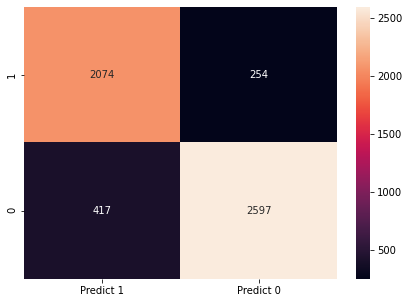

In [65]:
from sklearn import metrics
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Confusion Matrix for model with Bidirectional LSTM layer")

cm=metrics.confusion_matrix(y_test, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')   # fmt='g' shows exact values in confusion matrix

In [66]:
print("Classification Report of Model")
print(metrics.classification_report(y_test, pred, labels=[1, 0]))

Classification Report of Model
              precision    recall  f1-score   support

           1       0.83      0.89      0.86      2328
           0       0.91      0.86      0.89      3014

    accuracy                           0.87      5342
   macro avg       0.87      0.88      0.87      5342
weighted avg       0.88      0.87      0.87      5342



Here 1 stand for 'Sarcastic headline' and 0 for 'not Sarcastic headline'

In [67]:
# Lets predict some sample sentences
sample_headlines = ["I can't express how much I love shopping on black Friday", " that's what I love about Miami.Attention to detail in preserving historic landmarks of the past",
            " im just loving the positive vibes out of that","@UserName That must suck"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sample_headlines)

# padding the sequences
X_samp = pad_sequences(sequences, maxlen=max_length)

# Predicting the label
#print(model_3.predict(X_samp))
print(model_3.predict_classes(X_samp))

[[0]
 [0]
 [1]
 [1]]


Here 1 stand for 'Sarcastic headline' and 0 for 'not Sarcastic headline'

# (12) Conclusion:

(i)It has been found that Model with Bidirectional LSTM layer work better than others models but it is computational expensive then other model.

(ii)GloVe is another word embedding method.

(iii)GloVe(Global Vectors) is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

(iv)GloVe can be used to find relations between words like synonyms, company-product relations, zip codes and cities, etc. It is also used by the SpaCy model to build semantic word embeddings/feature vectors while computing the top list words that match with distance measures such as Cosine Similarity and Euclidean distance approach.

(v)Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.